<html>
<table width="100%" cellspacing="2" cellpadding="2" border="1">
<tbody>
<tr>
<td valign="center" align="center" width="45%"><img src="../media/Univ-Utah.jpeg"><br>
</td>
    <td valign="center" align="center" width="75%">
<h1 align="center"><font size="+1">University of Utah<br>Population Health Sciences<br>Data Science Workshop</font></h1></td>
<td valign="center" align="center" width="45%"><img
src="../media/U_Health_stacked_png_red.png" alt="Utah Health
Logo" width="128" height="134"><br>
</td>
</tr>
</tbody>
</table>
<br>
</html>


In [1]:
import pandas as pd
from helpers import *

In [6]:
conn = connect_to_mimic("uu-phs")

Enter password for MIMIC2 database········


# Data Domains in MIMIC
In the last notebook we learned the basics of SQL so we could interact with MIMIC. Now we'll dive deeper into the database and learn more about the types of clinical data that are stored in it.

The diagram below is taken from the [MIMIC-II documentation](https://archive.physionet.org/mimic2/UserGuide/UserGuide.pdf). If you want to see it enlarged, you can open it in a separate window: [MIMIC architecture](../media/mimic-ii-architecture.png).

This diagram shows the architecture of the database along with column names and relationships between tables. Note how much more complicated this is than the superhero clinic we used as an example in the first notebook of the module


![MIMIC architecture](../media/mimic-ii-architecture.png)


We can also see a list of all the tables by running the following query:

In [3]:
query = """
SHOW TABLES FROM mimic2;
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Tables_in_mimic2
0,a_chartdurations
1,a_iodurations
2,a_meddurations
3,additives
4,admissions
5,censusevents
6,chartevents
7,comorbidity_scores
8,d_caregivers
9,d_careunits


### TODO
Think of clinical data you might want to use in research. Where might you find these data elements in MIMIC? Which tables and column names would you need?

In the next few notebooks, we'll go through some of these tables in more detail and sharpen our SQL skills along the way.

# Administrative and demographic data
**Administrative and demographic data** define general information about the patient. This includes data elements such as:
- Name
- Sex
- Date of birth
- Insurance information

We've already been working with two tables containing these elements: `d_patients` and `demographic_detail`. Let's look more at the specific columns in these tables and do some analyses.

## `d_patients`
This table contains five basic columns about a patient:
- `subject_id`: The **primary key**/unique identifier which represents a patient
- `sex`
- `dob`: Date of birth
- `dod`: Date of death

#### TODO
Write and execute a query to load *all* rows and columns of the `d_patients` table and assign it to `df_patients`.

In [9]:
query = """
SELECT *
FROM d_patients;
"""

df_patients = pd.read_sql(query, conn)
df_patients.head()

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,sex,dob,dod,hospital_expire_flg
0,3,M,2606-02-28 00:00:00,2683-05-02 00:00:00,N
1,12,M,2803-05-14 00:00:00,2875-10-09 00:00:00,Y
2,21,M,3051-05-22 00:00:00,3139-03-28 00:00:00,Y
3,26,M,3007-03-02 00:00:00,3080-12-22 00:00:00,N
4,31,M,2606-05-17 00:00:00,2678-08-29 00:00:00,Y


In [ ]:
# query = """

# """

# df_patients = __.____(query, ____)
# df_patients.head()

#### TODO
Using `df_patients` to analyze the data, what proportion of patients died in the hospital?

In [60]:
# RUN CELL TO SEE QUIZ
quiz_prop_hospital_expire_flg

In [53]:
df_patients.groupby("hospital_expire_flg").size() / len(df_patients)

hospital_expire_flg
N    0.58675
Y    0.41325
dtype: float64

In [54]:
df_patients.groupby("hospital_expire_flg").size()

hospital_expire_flg
N    2347
Y    1653
dtype: int64

This table has one row per unique patient. So the `subject_id` is a one-to-one mapping from patients to their identifier.

#### TODO
How can you check in Python whether there are any patients with more than one row in `d_patients`?

In [23]:
# RUN CELL TO SEE HINT
hint_d_patients_unq

In [24]:
df_patients.groupby("subject_id").size().max()

1

In [25]:
len(set(df_patients["subject_id"])) == len(df_patients)

True

In [26]:
len(df_patients)

4000

### Renaming columns
Sometimes we might want to rename our columns, maybe to make it a name that's easier to understand or that is less ambiguous. We do this the same way we assigned *aliases* to tables:

```sql
SELECT column1 AS new_name
    ,column2 new_name2 -- 'AS' is optional
```


#### TODO
Select the first 10 rows of `d_patients` and rename `dob` to `date_of_birth` and `dod` to `date_of_death`. Save the assignment as `df_patients_renamed`

In [27]:
query = """
SELECT
    subject_id
    ,sex
    ,dob AS date_of_birth
    ,dod AS date_of_death
    ,hospital_expire_flg
FROM d_patients
LIMIT 10
"""

df_patients_renamed = pd.read_sql(query, conn)
df_patients_renamed

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,sex,date_of_birth,date_of_death,hospital_expire_flg
0,3,M,2606-02-28 00:00:00,2683-05-02 00:00:00,N
1,12,M,2803-05-14 00:00:00,2875-10-09 00:00:00,Y
2,21,M,3051-05-22 00:00:00,3139-03-28 00:00:00,Y
3,26,M,3007-03-02 00:00:00,3080-12-22 00:00:00,N
4,31,M,2606-05-17 00:00:00,2678-08-29 00:00:00,Y
5,37,M,3195-09-11 00:00:00,3265-12-31 00:00:00,N
6,56,F,2553-05-26 00:00:00,2644-01-23 00:00:00,Y
7,61,M,3297-10-27 00:00:00,3353-02-09 00:00:00,Y
8,67,M,2903-06-04 00:00:00,2976-11-29 00:00:00,Y
9,78,M,2729-08-08 00:00:00,2781-03-11 00:00:00,N


In [33]:
# query = """
# SELECT
#     subject_id
#     ,sex
#     ,__ AS ____
#     ,____
#     ,hospital_expire_flg
# FROM d_patients
# LIMIT 10
# """

# df_patients_renamed = pd.____(____, conn)
# df_patients_renamed

In [31]:
# RUN CELL TO TEST VALUE
validate_df_patients_renamed.test(df_patients_renamed)

That is correct!


### Calculating new columns
Often, tables don't have the exist data element we want. For example, let's say that we want to study patient age at death. There is no exact column for this in `d_patients`, but we can use `dod` and `dob` to calculate a new column.

Just like Python, SQL has certain **functions** that you can add to your queries. One such function is `DATEDIFF` which calculates the number of days between two dates:

```sql
SELECT DATEDIFF(date1, date2)
```

We can use that to calculate the number of days between patients' death and birth dates. When we calculate a new column we need to give it a name, so we'll call this one `age_at_death_days`.

In [38]:
query = """
SELECT 
    subject_id,
    dod,
    DATEDIFF(dod, dob) age_at_death_days
FROM d_patients p
LIMIT 10
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,dod,age_at_death_days
0,3,2683-05-02 00:00:00,28187
1,12,2875-10-09 00:00:00,26446
2,21,3139-03-28 00:00:00,32086
3,26,3080-12-22 00:00:00,26959
4,31,2678-08-29 00:00:00,26402
5,37,3265-12-31 00:00:00,25679
6,56,2644-01-23 00:00:00,33113
7,61,3353-02-09 00:00:00,20193
8,67,2976-11-29 00:00:00,26842
9,78,2781-03-11 00:00:00,18843


We can also do basic arithmetic like addition, subtraction, multiplication, and division using operators similar to Python: `+`, `-`, `*`, `/`.

#### TODO
Make a new version of `df_patients` with all 4,000 rows and a new column called `age_at_death` which is the patient's age when they died *in years*.

In [44]:
# RUN CELL TO SEE HINT
hint_age_in_years

In [47]:
query = """
SELECT *
    ,DATEDIFF(dod, dob) / 365 age_at_death
FROM d_patients;
"""

df_patients = pd.read_sql(query, conn)
df_patients.head()

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,sex,dob,dod,hospital_expire_flg,age_at_death
0,3,M,2606-02-28 00:00:00,2683-05-02 00:00:00,N,77.2247
1,12,M,2803-05-14 00:00:00,2875-10-09 00:00:00,Y,72.4548
2,21,M,3051-05-22 00:00:00,3139-03-28 00:00:00,Y,87.9068
3,26,M,3007-03-02 00:00:00,3080-12-22 00:00:00,N,73.8603
4,31,M,2606-05-17 00:00:00,2678-08-29 00:00:00,Y,72.3342


In [46]:
# query = """
# SELECT *
#     ,____
# """

# df_patients = pd.read_sql(query, conn)
# df_patients.head()

In [50]:
# RUN CELL TO TEST VALUE
test_age_at_death.test(df_patients)

That is correct!


#### TODO
Now that we know the age at death for patients, plot a boxplot comparing age at death for men and women. Import any necessary libraries for visualization.

In [68]:
# RUN CELL TO SEE HINT
hint_boxplot_age_death_by_sex

<AxesSubplot:xlabel='sex', ylabel='age_at_death'>

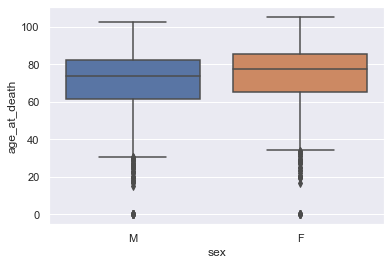

In [67]:
import seaborn as sns
sns.set()

sns.boxplot(x="sex", y="age_at_death", data=df_patients)

#### TODO
Write and execute a query to select just the `hadm_id`, `subject_id`, `admit_dt`, and `disch_dt` from the `admissions` table. Limit to the first 25 rows.

In [26]:
query = """
SELECT hadm_id, subject_id, admit_dt, disch_dt
FROM admissions
LIMIT 25;
"""

pd.read_sql(query, conn)

,hadm_id,subject_id,admit_dt,disch_dt
0,2,24807,3033-07-08 00:00:00,3033-07-17 00:00:00
1,3,7675,3388-05-16 00:00:00,3388-05-21 00:00:00
2,6,23547,3381-04-03 00:00:00,3381-04-22 00:00:00
3,10,14884,3015-08-28 00:00:00,3015-09-05 00:00:00
4,12,8652,3125-09-11 00:00:00,3125-09-22 00:00:00
5,15,7728,3491-04-08 00:00:00,3491-04-16 00:00:00
6,34,17025,3118-10-14 00:00:00,3118-10-25 00:00:00
7,35,15784,3036-10-02 00:00:00,3036-10-07 00:00:00
8,45,23014,3108-05-01 00:00:00,3108-06-05 00:00:00
9,47,9129,3129-06-19 00:00:00,3129-06-25 00:00:00


## Ordering results

25 earliest admissions:

In [15]:
query = """
SELECT hadm_id, subject_id, admit_dt, disch_dt
FROM admissions
ORDER BY admit_dt
LIMIT 25;
"""

pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,hadm_id,subject_id,admit_dt,disch_dt
0,6311,17754,2501-03-18 00:00:00,2501-04-01 00:00:00
1,3025,1428,2501-03-24 00:00:00,2501-04-14 00:00:00
2,5756,17754,2501-04-07 00:00:00,2501-04-08 00:00:00
3,14290,24082,2501-04-28 00:00:00,2501-05-01 00:00:00
4,1295,5853,2501-07-26 00:00:00,2501-08-19 00:00:00
5,5716,1795,2501-11-14 00:00:00,2501-11-30 00:00:00
6,7627,8907,2501-11-22 00:00:00,2501-12-06 00:00:00
7,30624,27327,2502-01-09 00:00:00,2502-01-12 00:00:00
8,2485,871,2502-04-01 00:00:00,2502-05-05 00:00:00
9,6687,22338,2502-04-12 00:00:00,2502-04-19 00:00:00


25 most recent admissions:

In [16]:
query = """
SELECT hadm_id, subject_id, admit_dt, disch_dt
FROM admissions
ORDER BY admit_dt DESC
LIMIT 25;
"""

pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,hadm_id,subject_id,admit_dt,disch_dt
0,20455,12573,3502-11-09 00:00:00,3502-11-15 00:00:00
1,1364,12573,3501-07-17 00:00:00,3501-07-27 00:00:00
2,24125,12050,3501-04-14 00:00:00,3501-04-25 00:00:00
3,34035,21131,3501-03-20 00:00:00,3501-03-21 00:00:00
4,16996,26040,3501-02-24 00:00:00,3501-03-13 00:00:00
5,6691,14267,3501-02-01 00:00:00,3501-03-06 00:00:00
6,25761,17327,3501-01-05 00:00:00,3501-01-08 00:00:00
7,16977,26040,3501-01-04 00:00:00,3501-01-24 00:00:00
8,19298,5307,3500-12-25 00:00:00,3501-01-24 00:00:00
9,7990,2827,3500-09-21 00:00:00,3500-10-05 00:00:00


#### TODO
Write a query to identify the 10 **oldest** patients in MIMIC. Then write another one to identify the 10 **youngest** patients.

In [18]:
query = """
SELECT *
FROM d_patients
ORDER BY dob 
LIMIT 10;
"""

pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,sex,dob,dod,hospital_expire_flg
0,10094,M,2405-06-25 00:00:00,2504-04-07 00:00:00,Y
1,27327,F,2411-09-29 00:00:00,2502-01-12 00:00:00,Y
2,26209,F,2414-12-01 00:00:00,2507-02-22 00:00:00,Y
3,32443,M,2419-02-19 00:00:00,2505-03-26 00:00:00,Y
4,29636,M,2420-04-01 00:00:00,2506-07-14 00:00:00,Y
5,871,F,2420-10-30 00:00:00,2502-05-05 00:00:00,Y
6,5225,M,2421-10-10 00:00:00,2510-08-30 00:00:00,N
7,5676,F,2421-11-13 00:00:00,2514-05-16 00:00:00,N
8,11724,M,2422-05-26 00:00:00,2503-02-26 00:00:00,Y
9,13686,M,2423-04-07 00:00:00,2507-07-29 00:00:00,N


In [19]:
query = """
SELECT *
FROM d_patients
ORDER BY dob DESC
LIMIT 10;
"""

pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,sex,dob,dod,hospital_expire_flg
0,12326,M,3498-02-04 00:00:00,3564-04-11 00:00:00,N
1,3455,M,3493-02-05 00:00:00,3585-01-20 00:00:00,N
2,259,M,3486-12-27 00:00:00,3554-05-20 00:00:00,N
3,12929,M,3485-11-12 00:00:00,3586-01-08 00:00:00,N
4,5889,F,3482-05-16 00:00:00,3482-05-17 00:00:00,Y
5,25175,M,3474-09-13 00:00:00,3501-03-09 00:00:00,N
6,25911,M,3470-07-08 00:00:00,3533-07-31 00:00:00,N
7,237,M,3468-07-13 00:00:00,3548-12-03 00:00:00,N
8,14469,F,3459-02-15 00:00:00,3508-11-23 00:00:00,N
9,4869,M,3457-09-06 00:00:00,3498-11-29 00:00:00,N


## Joining tables
In a relational database like MIMIC, different attributes for entities are stored in different tables. These disparate tables can then be joined together in a query using a `join` statement. The column `subject_id`, which is the identifier for a patient, is consistent between these two columns and can be used to join them together:

```SQL
FROM table1
    INNER JOIN table2
        ON table1.column = table2.column
```

#### TODO
Join the `demographic_detail` and `d_patients` tables using the `subject_id` column in both as the joining keys. Select all columns and the **top 10** rows.

In [30]:
query = """
SELECT *    -- Select statement
FROM demographic_detail d
    INNER JOIN d_patients p
        ON d.subject_id = p.subject_id
"""

In [31]:
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,hadm_id,marital_status_itemid,marital_status_descr,ethnicity_itemid,ethnicity_descr,overall_payor_group_itemid,overall_payor_group_descr,religion_itemid,religion_descr,admission_type_itemid,admission_type_descr,admission_source_itemid,admission_source_descr,subject_id,sex,dob,dod,hospital_expire_flg
0,56,28766,NaN,None,200083,WHITE,200053,MEDICARE-PRIVATE,200060.0,NOT SPECIFIED,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT,56,F,2553-05-26 00:00:00,2644-01-23 00:00:00,Y
1,37,18052,200050.0,MARRIED,200083,WHITE,200053,MEDICARE-PRIVATE,200047.0,JEWISH,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT,37,M,3195-09-11 00:00:00,3265-12-31 00:00:00,N
2,78,15161,200071.0,SEPARATED,200018,BLACK/AFRICAN AMERICAN,200052,MEDICARE,200060.0,NOT SPECIFIED,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT,78,M,2729-08-08 00:00:00,2781-03-11 00:00:00,N
3,67,35878,200072.0,SINGLE,200083,WHITE,200052,MEDICARE,200047.0,JEWISH,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT,67,M,2903-06-04 00:00:00,2976-11-29 00:00:00,Y
4,3,2075,200050.0,MARRIED,200083,WHITE,200052,MEDICARE,200023.0,CATHOLIC,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT,3,M,2606-02-28 00:00:00,2683-05-02 00:00:00,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5069,32667,36071,NaN,None,200083,WHITE,200052,MEDICARE,200062.0,OTHER,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT,32667,M,2778-01-19 00:00:00,2866-02-27 00:00:00,Y
5070,32627,33957,200050.0,MARRIED,200083,WHITE,200052,MEDICARE,200047.0,JEWISH,200028,EMERGENCY,200074,TRANSFER FROM HOSP/EXTRAM,32627,M,2699-08-04 00:00:00,2788-11-14 00:00:00,Y
5071,32675,35514,200071.0,SEPARATED,200018,BLACK/AFRICAN AMERICAN,200051,MEDICAID,200060.0,NOT SPECIFIED,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT,32675,M,2758-07-07 00:00:00,2816-04-29 00:00:00,Y
5072,32686,30102,200050.0,MARRIED,200083,WHITE,200067,PRIVATE,200081.0,UNOBTAINABLE,200028,EMERGENCY,200074,TRANSFER FROM HOSP/EXTRAM,32686,M,2543-12-06 00:00:00,2612-06-27 00:00:00,Y


## Filtering results
Typically we don't want to return *all* rows from a table. We instead usually filter based on conditions related to the columns of the table. This is where the `WHERE` clause comes in.

For example, to get the demographic details for a single patient, we can filter based on the `subject_id` column:

In [9]:
query = """
SELECT *
FROM demographic_detail d
WHERE subject_id = 78
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,hadm_id,marital_status_itemid,marital_status_descr,ethnicity_itemid,ethnicity_descr,overall_payor_group_itemid,overall_payor_group_descr,religion_itemid,religion_descr,admission_type_itemid,admission_type_descr,admission_source_itemid,admission_source_descr
0,78,15161,200071,SEPARATED,200018,BLACK/AFRICAN AMERICAN,200052,MEDICARE,200060,NOT SPECIFIED,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT


Run the query below - it returns an error. Scroll to the bottom of the error traceback and read the error description:

`"Column 'subject_id' in where clause is ambiguous"`


In [10]:
query = """
SELECT *
FROM demographic_detail d INNER JOIN
    d_patients p
        ON d.subject_id = p.subject_id
WHERE subject_id = 78
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


DatabaseError: Execution failed on sql '
SELECT *
FROM demographic_detail d INNER JOIN
    d_patients p
        ON d.subject_id = p.subject_id
WHERE subject_id = 78
': (1052, "Column 'subject_id' in where clause is ambiguous")

To fix this, we need to specify which column (from either `demographic_detail` or `d_patients`) to consider in the `WHERE` clause. Since we're using aliases, that means we should change the WHERE clause to:

`WHERE d.subject_id = 78`

or:

`WHERE p.subject_id = 78`

#### Question
Which table should we use in this instance? Why?

#### TODO
Write a query below to join `d_patients` and `hospital_admissions` and get all hospital admissions for the patient with subject_id **112**.

In [14]:
query = """
SELECT *
FROM d_patients p
    INNER JOIN admissions a
        ON p.subject_id = a.subject_id
WHERE p.subject_id = 112
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,sex,dob,dod,hospital_expire_flg,hadm_id,subject_id,admit_dt,disch_dt
0,112,M,2471-04-02 00:00:00,2565-07-04 00:00:00,Y,2028,112,2563-03-18 00:00:00,2563-03-23 00:00:00
1,112,M,2471-04-02 00:00:00,2565-07-04 00:00:00,Y,9111,112,2565-07-02 00:00:00,2565-07-04 00:00:00


## Creating new columns

In [24]:
query = """
SELECT 
    subject_id,
    dod,
    DATEDIFF(dod, dob) age_at_death_days
FROM d_patients p
WHERE p.subject_id = 112
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,dod,age_at_death_days
0,112,2565-07-04 00:00:00,34426


In [25]:
query = """
SELECT 
    subject_id,
    dod,
    DATEDIFF(dod, dob) / 365 age_at_death_days
FROM d_patients p
WHERE p.subject_id = 112
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,dod,age_at_death_days
0,112,2565-07-04 00:00:00,94.3178
